In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

From the R documentation :
### Housing Values in Suburbs of Boston
#### Format
The Boston data frame has 506 rows and 14 columns.  
This data frame contains the following columns:  

crim - per capita crime rate by town.  
zn - proportion of residential land zoned for lots over 25,000 sq.ft.  
indus - proportion of non-retail business acres per town.  
chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).  
nox - nitrogen oxides concentration (parts per 10 million).  
rm - average number of rooms per dwelling.  
age - proportion of owner-occupied units built prior to 1940.  
dis - weighted mean of distances to five Boston employment centres.  
rad - index of accessibility to radial highways.  
tax - full-value property-tax rate per \$10,000.  
ptratio - pupil-teacher ratio by town.  
black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.  
lstat - lower status of the population (percent).  
medv - median value of owner-occupied homes in \$1000s.  

#### Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.  
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
!head ../Data/Boston.csv

"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5


In [3]:
boston = pd.read_csv("../Data/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


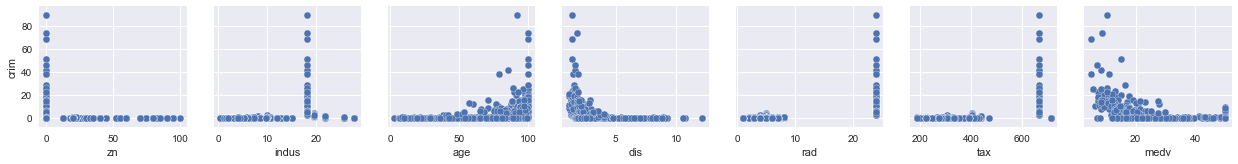

In [4]:
sns.pairplot(boston, y_vars=['crim'], x_vars=['zn', 'indus', 'age', 'dis', 'rad', 'tax', 'medv']);

The predictors associated with per capita crime rate are :  
*crim* > 0 only when *zn* = 0, *rad* > 20 and *tax* > 600.  
*age* has a positive correlation with *crim*. *dis* and *medv* have negative correlations with crim.  

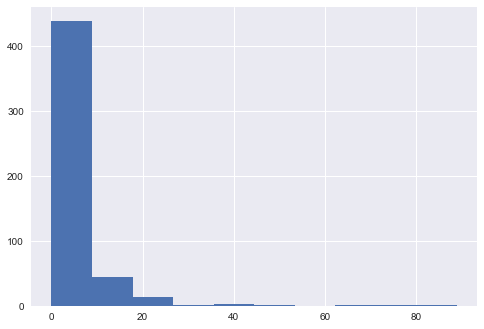

In [5]:
boston.crim.hist();

In [6]:
#We look at the suburbs with high crime rates
boston[boston.crim > 30]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


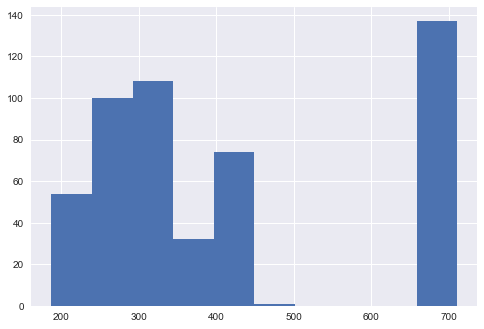

In [7]:
boston.tax.hist();

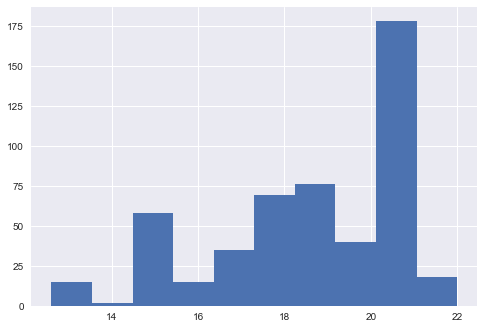

In [8]:
boston.ptratio.hist();

In [9]:
#35 suburbs bound the Charles rives
boston.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [10]:
boston.ptratio.median()

19.05

In [11]:
#The two suburbs that have the lowest median value of owner-occupied homes
boston.sort_values('medv').head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [12]:
print('Number of suburbs averaging more than 7 rooms per dwelling : ' + str(len(boston[boston.rm > 7])))
print('Number of suburbs averaging more than 8 rooms per dwelling : ' + str(len(boston[boston.rm > 8])))

Number of suburbs averaging more than 7 rooms per dwelling : 64
Number of suburbs averaging more than 8 rooms per dwelling : 13


In [13]:
#Suburbs that average more than 8 rooms per dwelling
boston[boston.rm > 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
